In [2]:
from autograd import grad
import autograd.numpy as np

In [2]:
from numpy.linalg import det
def BC(X,Y):
    return det(np.dot(X.T,Y)) / np.sqrt(det(np.dot(X.T,X)) * det(np.dot(Y.T,Y)))

In [23]:
np.random.seed(0)
X = np.random.rand(1000)*10
Y = 2*X + np.random.randn(1000)+5

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

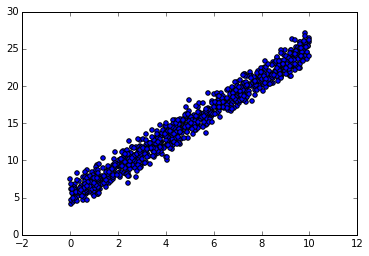

In [26]:
plt.scatter(X,Y)

In [104]:
def loss(theta):
    return -np.sum((Y-(theta[0]*X+theta[1]))**2)

In [105]:
loss((2,5))

-934.32577445239758

In [106]:
gradient = grad(loss)

In [107]:
gradient(np.zeros(2))

array([ 181870.67601732,   29894.94974059])

In [111]:
n=1000
x = np.zeros((n,2))
for i in range(1,n):
    x[i] = x[i-1] + gradient(x[i-1])*0.000001

In [112]:
x[-1]

array([ 2.41886504,  2.24361507])

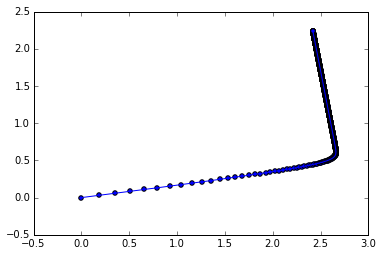

In [113]:
plt.plot(x[:,0],x[:,1])
plt.scatter(x[:,0],x[:,1])

In [446]:
def autocorrelation(X,k=1):
    mu = X.mean(0)
    denom=(len(X)-k)*np.std(X,0)**2
    s = np.sum((X[:-k]-mu)*(X[k:]-mu),0)
    return np.sum(s/denom)
    #return np.sum(s/denom)

In [531]:
def time_lag_corr_cov(X,tau=1):
    #mu = (X[:-tau].mean(0) + X[tau:].mean(0)) / 2
    mu = X.mean(0)
    X_ = X-mu
    M = len(X) - tau
    dim = len(X.T)
    corr = np.zeros((dim,dim))
    cov = np.zeros((dim,dim))
    for i in range(M):
        corr += np.outer(X_[i],X_[i+tau]) + np.outer(X_[i+tau],X_[i])
        cov += np.outer(X_[i],X_[i]) + np.outer(X_[i+tau],X_[i+tau])
    return corr / (2.0*M),cov / (2.0*M)

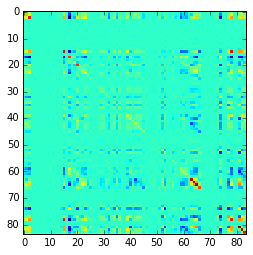

In [536]:
def autocorr(X,tau=1):
    mu = X.mean(0)
    X_ = X-mu
    M = len(X) - tau
    dim = len(X.T)
    corr = np.zeros((dim,dim))
    for i in range(M):
        corr += np.outer(X_[i],X_[i+tau]) + np.outer(X_[i+tau],X_[i])
    return corr / (2.0*M)

c = autocorr(X_dihedral[:10000])
plt.imshow(c,interpolation='none')

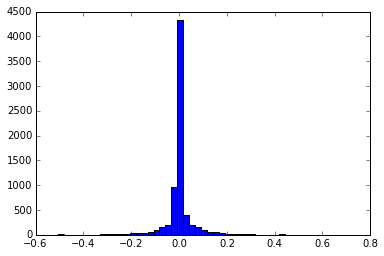

In [549]:
plt.hist(c.reshape(np.prod(c.shape)),bins=50);

In [553]:
for i in range(10):
    print(np.sum(np.abs(autocorr(np.random.randn(1000,84)))))

126.870378741
127.352984372
125.744061127
125.41081678
127.146192582
127.114146144
125.251621406
125.642977222
126.265956242
130.183072033


In [552]:
np.sum(np.abs(autocorr(X_dihedral[:10000])))

200.2648099577363

In [532]:
time_lag_corr_cov(X_dihedral)

(array([[  5.34731614e-02,   1.02479150e-02,   1.09036138e-02, ...,
           8.11111667e-03,   4.65396996e-03,  -5.14005893e-04],
        [  1.02479150e-02,   7.50955461e-02,   1.99509757e-02, ...,
           2.96661861e-03,   1.44088783e-02,   2.91962291e-03],
        [  1.09036138e-02,   1.99509757e-02,   5.60410698e-02, ...,
          -8.87908554e-03,   4.11025273e-03,   5.34145917e-03],
        ..., 
        [  8.11111667e-03,   2.96661861e-03,  -8.87908554e-03, ...,
           2.45416456e-01,   1.27587891e-01,   6.56333443e-02],
        [  4.65396996e-03,   1.44088783e-02,   4.11025273e-03, ...,
           1.27587891e-01,   6.32641612e-01,   2.46835418e-01],
        [ -5.14005893e-04,   2.91962291e-03,   5.34145917e-03, ...,
           6.56333443e-02,   2.46835418e-01,   6.62830222e-01]]),
 array([[  7.21106966e-02,   1.03182610e-02,   1.07774718e-02, ...,
           8.15109420e-03,   4.66923198e-03,  -5.94737988e-04],
        [  1.03182610e-02,   8.68528782e-02,   1.99040486e-0

In [447]:
np.std(X_dihedral,0).shape

(84,)

In [448]:
X_dihedral.mean(0).shape

(84,)

In [5]:
from msmbuilder.example_datasets import AlanineDipeptide,FsPeptide
dataset = FsPeptide().get()
fs_trajectories = dataset.trajectories
from msmbuilder import featurizer
dhf = featurizer.DihedralFeaturizer()
dhft = dhf.fit_transform(fs_trajectories)
X_dihedral = np.vstack(dhft)#[0]

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


In [508]:
X_dihedral.mean(0).shape

(84,)

In [509]:
X_dihedral.shape

(280000, 84)

In [510]:
autocorrelation(X_dihedral)

68.898237813741176

In [511]:
from sklearn.decomposition import PCA
pca = PCA(2)
autocorrelation(pca.fit_transform(X_dihedral))

1.9735162402530837

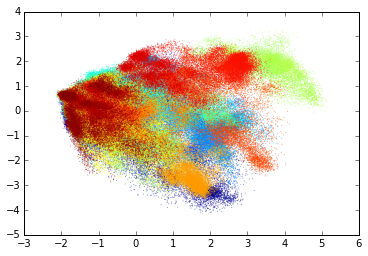

In [513]:
X_ = pca.fit_transform(X_dihedral)
plt.scatter(X_[:,0],X_[:,1],linewidths=0,s=1,
            c=np.arange(len(X_)),alpha=0.5)

In [514]:
A_init = pca.components_.T
A_init.shape

(84, 2)

In [515]:
np.dot(X_dihedral,A_init)

array([[-2.33946753, -0.89564353],
       [-2.60062861, -1.45025086],
       [-2.26692963, -1.53225303],
       ..., 
       [-2.75940418,  1.27710533],
       [-2.97198439,  1.17977309],
       [-3.00106859,  1.19465375]], dtype=float32)

In [8]:
from msmbuilder.decomposition import tICA
tica = tICA(2,10)
X_tica = tica.fit_transform([X_dihedral])[0]
#autocorrelation(X_tica)

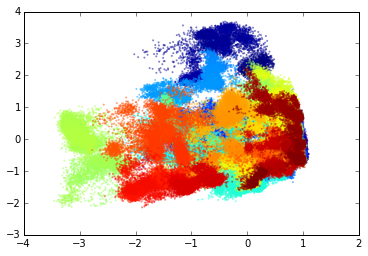

In [519]:
plt.scatter(X_tica[:,0],X_tica[:,1],linewidths=0,s=4,
            c=np.arange(len(X_)),alpha=0.5)

In [520]:
A_init_tica=tica.components_.T

In [521]:
def autocorr_loss(A_vec):
    A = np.reshape(A_vec,A_init.shape)
    X_ = np.dot(X_dihedral,A)
    X_ /= (np.max(X_) - np.min(X_))
    return autocorrelation(X_)

In [522]:
autocorr_loss(A_init_tica.reshape(84*2))

1.9894663016784198

In [523]:
autocorr_grad = grad(autocorr_loss)

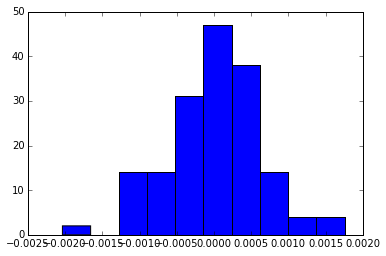

In [524]:
plt.hist(autocorr_grad(A_init_tica.reshape(84*2)));

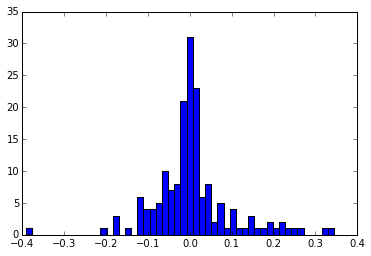

In [525]:
plt.hist(A_init_tica.reshape(84*2),bins=50);

In [411]:
%timeit autocorr_loss(A_init_tica.reshape(84*2))

100 loops, best of 3: 3.34 ms per loop


In [412]:
%timeit autocorr_grad(A_init_tica.reshape(84*2))

100 loops, best of 3: 8.91 ms per loop


In [528]:
n=100
x = np.zeros((n,84*2))
x[0] = A_init_tica.reshape(84*2)
from time import time
t = time()
for i in range(1,n):
    x[i] = x[i-1] + autocorr_grad(x[i-1])*10
    print(i,time()-t)

(1, 1.2756741046905518)
(2, 2.4555060863494873)
(3, 3.682971954345703)
(4, 4.900946140289307)
(5, 6.144735097885132)
(6, 7.42544412612915)
(7, 8.672209978103638)
(8, 9.887005090713501)
(9, 11.1405611038208)
(10, 12.347078084945679)
(11, 13.682538986206055)
(12, 14.987375020980835)
(13, 16.176119089126587)
(14, 17.352954149246216)
(15, 18.535717964172363)
(16, 19.724857091903687)
(17, 20.996942043304443)
(18, 22.221500158309937)
(19, 23.408400058746338)
(20, 24.601027011871338)
(21, 25.814558029174805)
(22, 27.053038120269775)
(23, 28.427603006362915)
(24, 29.96596908569336)
(25, 31.183199167251587)
(26, 32.408610105514526)
(27, 33.67013216018677)
(28, 34.930222034454346)
(29, 36.242202043533325)
(30, 37.65337610244751)
(31, 39.01504707336426)
(32, 40.237180948257446)
(33, 41.50289797782898)
(34, 42.82864999771118)
(35, 44.210366010665894)
(36, 45.44645094871521)
(37, 46.644782066345215)
(38, 47.85747694969177)
(39, 49.06873416900635)
(40, 50.29502606391907)
(41, 51.56689405441284)
(42,

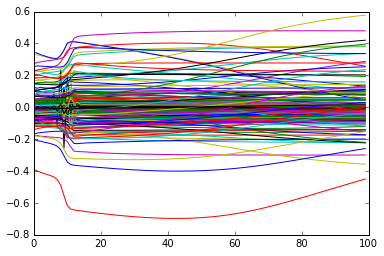

In [560]:
plt.plot(x);


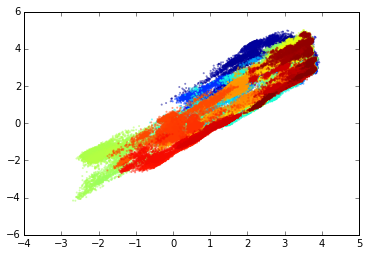

In [530]:
X_ = np.dot(X_dihedral,x[-1].reshape(84,2))
plt.scatter(X_[:,0],X_[:,1],linewidths=0,s=4,
            c=np.arange(len(X_)),alpha=0.5)

In [561]:
X_dihedral.shape

(280000, 84)

In [468]:
for i in range(len(x))[::50]:
    X_ = np.dot(X_dihedral,x[i].reshape(84,2))
    plt.scatter(X_[:,0],X_[:,1],linewidths=0,s=4,
                c=np.arange(len(X_)),alpha=0.5)
    plt.savefig('{0}.jpg'.format(i))
    plt.close()

In [469]:
autocorr_loss(x[-1]),autocorr_loss(A_init_tica),autocorr_loss(A_init)

(1.9957626524900636, 1.9947409358638186, 1.9879298)

In [478]:
def autocorr_loss_mult(A_vec):
    A = np.reshape(A_vec,A_init.shape)
    X_ = np.dot(X_dihedral,A)
    return autocorrelation(X_,1) + autocorrelation(X_,10)
    #s = 0
    #for i in range(10):
    #    s += autocorrelation(X_,1+2*i)
    return autocorrelation(X_)

In [479]:
autocorrelation(X_dihedral,10)

41.089905

In [480]:
autocorr_grad_mult = grad(autocorr_loss_mult)

In [482]:
autocorr_loss_mult(np.ones(84*2))

3.699189352176437

In [481]:
autocorr_grad_mult(np.ones(84*2)).shape

(168,)

In [486]:
n=1000
x = np.zeros((n,84*2))
x[0] = A_init_tica.reshape(84*2)
for i in range(1,n):
    x[i] = x[i-1] + autocorr_grad_mult(x[i-1])

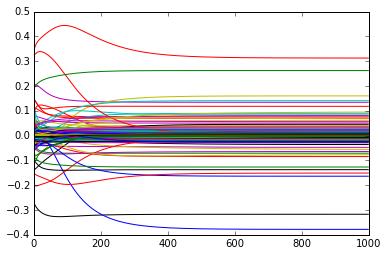

In [487]:
plt.plot(x);

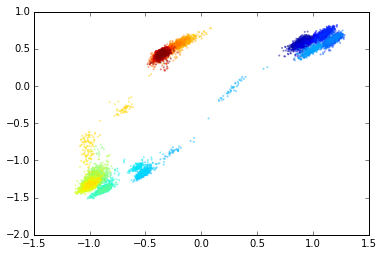

In [495]:
X_ = np.dot(X_dihedral,x[100].reshape(84,2))
plt.scatter(X_[:,0],X_[:,1],linewidths=0,s=4,
            c=np.arange(len(X_)),alpha=0.5)

In [490]:
l = [autocorr_loss_mult(x_) for x_ in x]

In [492]:
l

[3.983951859123092,
 3.9848932702859257,
 3.985466113536182,
 3.9858801974996774,
 3.9862011907840609,
 3.9864601126246266,
 3.9866738546013094,
 3.9868528480077798,
 3.987004245465696,
 3.9871333201369783,
 3.9872441386594453,
 3.9873399223710315,
 3.9874232638548541,
 3.987496269852536,
 3.9875606629225597,
 3.9876178576971721,
 3.9876690200880787,
 3.9877151142009217,
 3.9877569399218502,
 3.9877951631895989,
 3.9878303404315019,
 3.9878629383059478,
 3.9878933496632669,
 3.9879219064618665,
 3.9879488902367859,
 3.9879745406029885,
 3.9879990621826877,
 3.9880226302667166,
 3.9880453954587263,
 3.9880674874991642,
 3.9880890184260385,
 3.9881100851973712,
 3.9881307718747068,
 3.9881511514472718,
 3.9881712873608368,
 3.9881912348026916,
 3.9882110417847478,
 3.9882307500587504,
 3.988250395891777,
 3.988270010724805,
 3.9882896217337058,
 3.9883092523082113,
 3.9883289224622871,
 3.9883486491867677,
 3.9883684467537952,
 3.9883883269803859,
 3.988408299457975,
 3.9884283717536224,

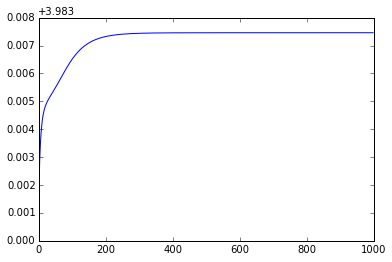

In [491]:
plt.plot(l)

In [ ]:
# idea: tICA requires the specification of 
# a single autocorrelation time-- can we consider multiple?

In [563]:
# we want to find an embedding of the dihedral angles that puts kinetically-nearby points near each other in the embedding

In [564]:
X_dihedral.shape

(280000, 84)

In [653]:
pca_w = PCA(whiten=True)
X_dihedral_whitened = pca_w.fit_transform(X_dihedral)

In [654]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dihedral_whitened)

In [655]:
sum(pca.explained_variance_ratio_)

0.023809560189405953

In [656]:
from scipy.spatial.distance import euclidean

In [906]:
def d(x,y):
    return np.sqrt(np.dot(x-y,x-y))

def scalar_penalize(close_distance,far_distance):
    return close_distance-far_distance

def mult_penalize(close_distance,far_distance):
    return close_distance/far_distance

def exp_penalize(close_distance,far_distance,scale=10):
    return np.exp(scale*(close_distance-far_distance))

def zero_one_penalize(close_distance,far_distance):
    return 1.0*(close_distance > far_distance)

def triplet_batch_objective_simple(embedding_points,tau_1=1,tau_2=10,penalize=scalar_penalize):
    loss = 0.0
    n_triplets = len(embedding_points) - tau_2
    assert(n_triplets>0)
    for i in range(n_triplets):
        close = d(embedding_points[i],embedding_points[i+tau_1])
        far = d(embedding_points[i],embedding_points[i+tau_2])
        loss += penalize(close,far)
        #print(close,far)
        #print(contribution)
    return loss / n_triplets

In [836]:
triplet_batch_objective_simple(X_dihedral,penalize=zero_one_penalize)

0.24513018322082933

In [837]:
triplet_batch_objective_simple(X_dihedral,tau_1=5,tau_2=10,penalize=zero_one_penalize)

0.40134647665988071

In [839]:
triplet_batch_objective_simple(X_dihedral,tau_1=1,tau_2=100,penalize=zero_one_penalize)

0.095787781350482312

In [840]:
sample = X_dihedral[:10000]

In [842]:
%timeit triplet_batch_objective_simple(sample,tau_1=1,tau_2=100,penalize=zero_one_penalize)

10 loops, best of 3: 155 ms per loop


In [861]:
taus = np.array([1,2,3,4,5,10,20,30,40,50,100,200,300,400,500])
results = np.zeros((len(taus),len(taus)))

for i,tau_1 in enumerate(taus):
    for j,tau_2 in enumerate(taus):
        if tau_2 > tau_1:
            results[i,j] = triplet_batch_objective_simple(sample,tau_1=tau_1,tau_2=tau_2,penalize=zero_one_penalize)

<matplotlib.colorbar.Colorbar instance at 0x14e0e6d88>

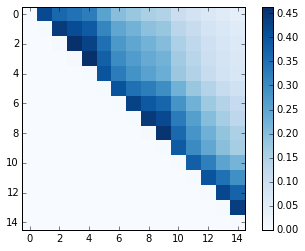

In [864]:
plt.imshow(results,interpolation='none',cmap='Blues')
plt.colorbar()

In [718]:
# alternate flow: select random center points along the trajectory....

In [907]:
def stoch_triplet_objective(transform,full_set,tau_1=1,tau_2=10,batch_size=50,penalize=scalar_penalize):
    
    '''to-do: make this work with a list of trajectories'''
    
    if type(full_set)==list:
        # it's a list of trajectories, each a numpy array
        list_ind = np.random.randint(0,len(full_set),batch_size)
        centers = np.random.randint(0,len(full_set[0])-tau_2,batch_size)
        triplets = [(full_set[l][c],full_set[l][c+tau_1],full_set[l][c+tau_2]) for l,c in zip(list_ind,centers)]
    else:
        # it's just one trajectory in a numpy array
        centers = np.random.randint(0,len(full_set)-tau_2,batch_size)
        triplets = [(full_set[c],full_set[c+tau_1],full_set[c+tau_2]) for c in centers]
    
    triplets = [(transform(a),transform(b),transform(c)) for (a,b,c) in triplets]
    loss = 0
    for i in range(batch_size):
        close = d(triplets[i][0],triplets[i][1])
        far = d(triplets[i][0],triplets[i][2])
        loss += penalize(close,far)
    return loss / batch_size

In [775]:
%timeit stoch_triplet_objective(lambda i:i,dhft,batch_size=100)

1000 loops, best of 3: 1.51 ms per loop


In [787]:
loss(pca.components_.T)

-0.055016825001686809

In [900]:
A.shape,A.sum(0).shape
sum(np.abs(A)),sum(np.abs(A/np.abs(A).sum(0)))

(array([ 0.00068699,  0.00070484]), array([ 1.,  1.]))

(0.23359319631467043, 0.032474691723584637)


(0.11728257568087475, 0.13001659995487677)

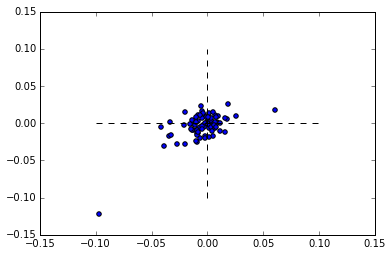

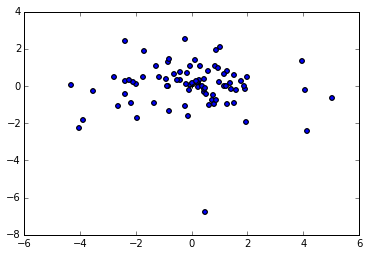

In [910]:
def loss(weights,batch_size=1000):
    transform = lambda x:np.dot(x,weights)
    return stoch_triplet_objective(transform,dhft,batch_size=batch_size)

def loss_vec(weights,target_dim=2,batch_size=100,penalize=mult_penalize):
    A = np.reshape(weights,(weights.shape[0]/target_dim,target_dim))
    #A /= np.sum(A,0)
    #A /= np.abs(A).sum(0)
    #A = A/np.reshape(np.sum(A**2,1),(weights.shape[0]/target_dim,1))
    transform = lambda x:np.dot(x,A)
    return stoch_triplet_objective(transform,dhft,batch_size=batch_size,penalize=penalize)

grad_loss = grad(loss)
plt.scatter(grad_loss(np.ones(84)),grad_loss(np.ones(84)))
plt.hlines(0,-0.1,0.1,linestyles='--')
plt.vlines(0,-0.1,0.1,linestyles='--')

print(spearmanr(grad_loss(np.ones(84)),grad_loss(np.ones(84))))

plt.figure()

grad_loss = grad(loss_vec)
plt.scatter(grad_loss(np.ones(84*2)),grad_loss(np.ones(84*2)))
plt.hlines(0,-0.1,0.1,linestyles='--')
plt.vlines(0,-0.1,0.1,linestyles='--')
spearmanr(grad_loss(np.ones(84*2)),grad_loss(np.ones(84*2)))

In [829]:
from scipy.optimize import minimize
from autograd.convenience_wrappers import hessian_vector_product as hvp
results = minimize(lambda w:loss_vec(w,batch_size=1000),pca.components_.T.flatten(),jac=grad(loss_vec),hessp=hvp(loss_vec,84*2))

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/autograd/core.py:107: RuntimeWarning: invalid value encountered in divide
  result = self.fun(*argvals, **kwargs)
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


In [825]:
results

   status: 2
  success: False
     njev: 27
     nfev: 39
 hess_inv: array([[ -2.21817050e+04,   2.65480841e+02,   9.18386187e+02, ...,
          2.21434940e+04,  -2.01959794e+05,   2.34673139e+03],
       [  2.65480841e+02,  -2.17723157e+00,  -1.09911514e+01, ...,
         -2.65011565e+02,   2.41703806e+03,  -2.80853657e+01],
       [  9.18386187e+02,  -1.09911514e+01,  -3.70220869e+01, ...,
         -9.16762811e+02,   8.36133699e+03,  -9.71569047e+01],
       ..., 
       [  2.21434940e+04,  -2.65011565e+02,  -9.16762811e+02, ...,
         -2.21033523e+04,   2.01602802e+05,  -2.34258321e+03],
       [ -2.01959794e+05,   2.41703806e+03,   8.36133699e+03, ...,
          2.01602802e+05,  -1.83871785e+06,   2.13655326e+04],
       [  2.34673139e+03,  -2.80853657e+01,  -9.71569047e+01, ...,
         -2.34258321e+03,   2.13655326e+04,  -2.47262401e+02]])
      fun: -623081.39430930861
        x: array([  1.53409553e+05,  -1.83599060e+03,  -6.35145357e+03,
         9.25355340e+04,   4.86300

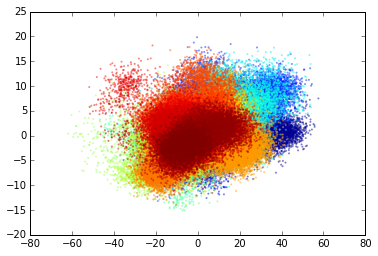

In [826]:
A = results['x'].reshape((84,2))
A = A/np.reshape(np.sum(A**2,1),(84,1))
projected = np.dot(X_dihedral,A)
projected /= np.sum(projected,0)
plt.scatter(projected[:,0],projected[:,1],linewidths=0,s=4,
            c=np.arange(len(projected)),alpha=0.5)

In [809]:
np.sum(A,0).shape

(2,)

In [802]:
triplet_batch_objective_simple(projected),triplet_batch_objective_simple(X_pca),triplet_batch_objective_simple(X_tica)

(-237709.37021398873, -0.13081254662521502, -0.02914822703015163)

In [877]:
def adagrad(grad, x, num_iters=100, step_size=0.1, gamma=0.9, eps = 10**-8):
    """Root mean squared prop: See Adagrad paper for details.
    
    Stolen from autograd examples: https://github.com/HIPS/autograd/blob/master/examples/optimizers.py#L21"""
    avg_sq_grad = np.ones(len(x))
    history = np.zeros((num_iters+1,len(x)))
    history[0] = x
    for i in xrange(num_iters):
        g = grad(x)
        avg_sq_grad = avg_sq_grad * gamma + g**2 * (1 - gamma)
        x -= step_size * g/(np.sqrt(avg_sq_grad) + eps)
        history[i+1] = x
    return history

In [920]:
loss_func = lambda weights:loss_vec(weights,batch_size=1000,penalize=scalar_penalize)
history = adagrad(grad(loss_func),pca.components_.T.flatten(),num_iters=100)

In [929]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dihedral)

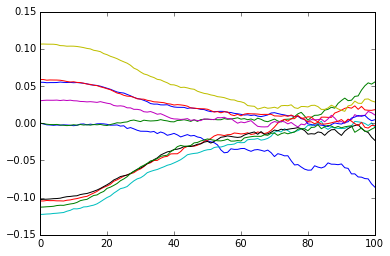

In [921]:
normed_history = norm_history(history)
plt.plot(normed_history[:,:10]);

In [932]:
def rotation_matrix(theta=np.pi/2):
    r = np.zeros((2,2))
    r[0,0] = r[1,1] = np.cos(theta)
    r[0,1] = np.sin(theta)
    r[1,0] = -np.sin(theta)
    return r

np.dot(projected,rotation_matrix())

array([[ 0.12059438,  0.32942242],
       [ 0.06334414,  0.43453591],
       [-0.13716879,  0.49586   ],
       ..., 
       [-0.03424259,  0.82814035],
       [ 0.07694437,  0.7218961 ],
       [ 0.02018024,  0.70227231]])

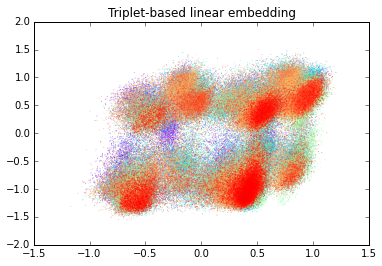

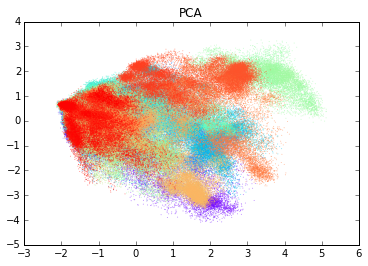

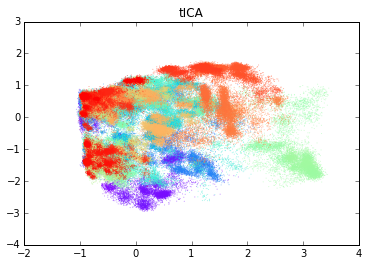

In [935]:
proj_mat = np.reshape(normed_history[-1],(84,2))
projected = np.dot(X_dihedral,proj_mat)
#projected /= np.sum(projected,0)
projected = np.dot(projected,rotation_matrix(np.pi/4))
plt.scatter(projected[:,0],projected[:,1],linewidths=0,s=1,
            c=np.arange(len(projected)),alpha=0.5,cmap='rainbow')
plt.title('Triplet-based linear embedding')
plt.figure()

plt.scatter(X_pca[:,0],X_pca[:,1],linewidths=0,s=1,
            c=np.arange(len(projected)),alpha=0.5,cmap='rainbow')
plt.title('PCA')
plt.figure()

plt.scatter(X_tica[:,0],X_tica[:,1],linewidths=0,s=1,
            c=np.arange(len(projected)),alpha=0.5,cmap='rainbow')
plt.title('tICA')

In [973]:
from mdp.nodes import XSFANode
xsfa = XSFANode(output_dim=2)
pca = PCA()
X_dihedral_ = pca.fit_transform(X_dihedral)[:,:20]
X_xsfa = xsfa.execute(X_dihedral_)

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages

In [975]:
len(projected),len(X_xsfa)

(280000, 280000)

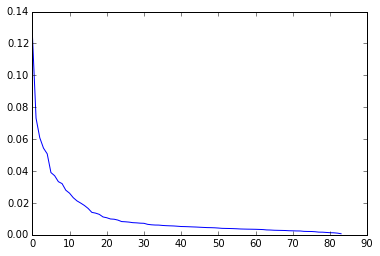

In [963]:
plt.plot(pca.explained_variance_ratio_)

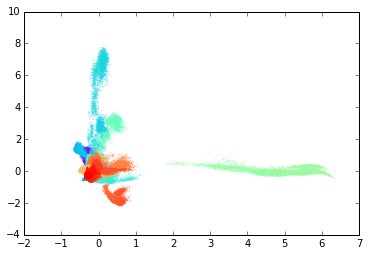

In [976]:
plt.scatter(X_xsfa[:,0],X_xsfa[:,1],linewidths=0,s=1,
            c=np.arange(len(X_xsfa)),alpha=0.5,cmap='rainbow')

In [ ]:
# now let's test which embedding is best for constructing MSMs...

from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline

results = dict()
embeddings = [('tICA',X_tica),('PCA',X_pca),('Triplet',projected),('xSFA',X_xsfa)]
for (name,dataset) in embeddings:
    pipeline = Pipeline([
        ('cluster', MiniBatchKMeans(n_clusters=100)),
        ('msm', MarkovStateModel(lag_time=10))
    ])
    pipeline.fit([dataset[:100000]])
    results[name] = pipeline
    print(name,pipeline.score([dataset[100000:]]))

MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
('tICA', 9.7099445473289929)
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
('PCA', 8.5677762821306302)
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%

In [951]:
msm = MarkovStateModel()
msm.fit(np.random.randint(0,10,100000))
print(msm.summarize())

MSM contains 1 strongly connected component above weight=1.00. Component 0 selected, with population 100.000000%
Markov state model
------------------
Lag time         : 1
Reversible type  : mle
Ergodic cutoff   : 1.0
Prior counts     : 0

Number of states : 10
Number of nonzero entries in counts matrix : 100 (100.0%)
Nonzero counts matrix entries:
    Min.   : 928.0
    1st Qu.: 982.0
    Median : 1004.5
    Mean   : 1000.0
    3rd Qu.: 1019.5
    Max.   : 1082.0

Total transition counts :
    99999.0 counts
Total transition counts / lag_time:
    99999.0 units
Timescales:
    [0.23, 0.20, 0.19, 0.17, 0.15, nan, nan, nan, nan]  units



In [916]:
from time import time
t = time()
grad(loss_vec)(pca.components_.T.flatten())
print(time()-t)

0.0778019428253


In [873]:
pca.components_.T.flatten().shape

(168,)

In [786]:
from scipy.stats import spearmanr
spearmanr(grad_loss(np.ones(84)),grad_loss(np.ones(84)))

(0.43426141540953733, 3.6727068404420694e-05)

In [749]:
objective_evaluations = np.array([stoch_triplet_objective(dhft,tau_1=1,tau_2=100,batch_size=100) for _ in range(1000)])

In [750]:
objective_evaluations.std(),objective_evaluations.mean()

(0.078510417209893948, -1.0240131136143207)

In [743]:
fs_trajectories

[<mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x16fdf79d0>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x16fdf72d0>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x16f9d3ad0>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x1701c66d0>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x1701c6dd0>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x1701c6510>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x1701c67d0>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x1701c6710>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x1702cb310>,
 <mdtraj.Trajectory with 10000 frames, 264 atoms, 23 residues, without unitcells at 0x1702cbc50>,
 <mdtraj.Trajectory 

In [742]:
a = []
type(a)==list

True

In [738]:
objective_evaluations = np.array([stoch_triplet_objective(X_pca,tau_1=1,tau_2=100,batch_size=100) for _ in range(1000)])

In [739]:
objective_evaluations.std(),objective_evaluations.mean()

(0.089872599257035876, -0.30047579470220953)

In [658]:
pca.components_.shape

(2, 84)

In [659]:
triplet_batch_objective_simple(X_pca[:11])

-1.1056914329528809

In [660]:
np.dot(X_dihedral,pca.components_.T).shape

(280000, 2)

In [661]:
def sgd(objective,dataset,init_point,batch_size=20,n_iter=100,step_size=0.01,seed=0,stoch_select=False):
    ''' objective takes in a parameter vector and an array of data'''
    np.random.seed(seed)
    testpoints = np.zeros((n_iter,len(init_point)))
    testpoints[0] = init_point
    ind=0
    for i in range(1,n_iter):
        if stoch_select:
            
        else:
            max_ind = ind+batch_size
            if max_ind>=len(dataset):
                ind = max_ind % len(dataset)
                max_ind = ind+batch_size
            subset = dataset[ind:max_ind]
            ind = (ind + batch_size)
        obj_grad = grad(lambda p:objective(p,subset))
        raw_grad = obj_grad(testpoints[i-1])
        gradient = np.nan_to_num(raw_grad)
        #print(gradient,raw_grad)
        testpoints[i] = testpoints[i-1] - gradient*step_size
    return np.array(testpoints)

In [662]:
def projection_obj(proj_vec,subset):
    # WARNING: CURRENTLY HARD-CODED PROJECTION MATRIX DIMENSIONS...
    A = np.reshape(proj_vec,(84,2))
    A /= (A**2).sum(0)
    projected = np.dot(subset,A)
    return triplet_batch_objective_simple(projected)

In [663]:
(A**2).sum(0)

array([ 1.88739624,  2.22063617])

In [712]:
raw_points = sgd(projection_obj,X_dihedral_whitened,pca.components_.T.flatten(),step_size=0.01,
                 n_iter=1000,batch_size=20)

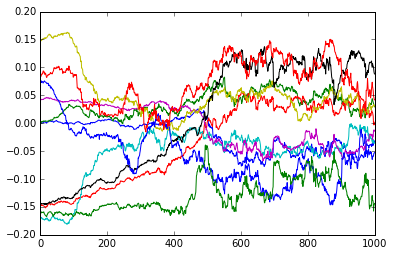

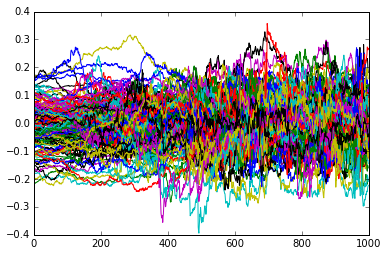

In [881]:
def norm(s):
    return s / np.sqrt(np.sum(s**2))

plt.plot(raw_points[:,:10]);
plt.figure()
def norm_history(raw_points):
    return np.array([norm(s) for s in raw_points])
normed_points = norm_history(raw_points)
plt.plot(normed_points);

In [707]:
(pca.components_).flatten().shape

(168,)

In [708]:
A = np.reshape(raw_points[-1],(84,2))
projected = np.dot(X_dihedral,A)

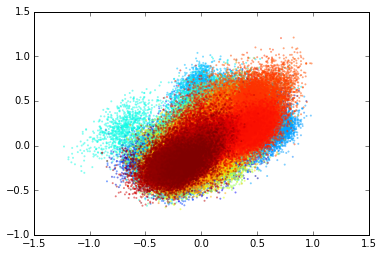

In [709]:
plt.scatter(projected[:,0],projected[:,1],linewidths=0,s=4,
            c=np.arange(len(projected)),alpha=0.5)

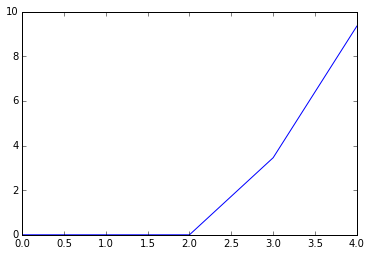

In [681]:
plt.plot(np.linalg.eigh(A.dot(A.T))[0][-5:])

In [672]:
tica = tICA(n_components=2)
X_tica = tica.fit_transform([X_dihedral_whitened])[0]

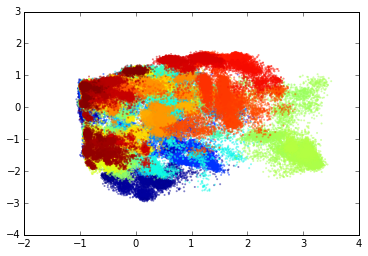

In [673]:
plt.scatter(X_tica[:,0],X_tica[:,1],linewidths=0,s=4,
            c=np.arange(len(projected)),alpha=0.5)

In [674]:
triplet_batch_objective_simple(X_pca),triplet_batch_objective_simple(X_tica),triplet_batch_objective_simple(projected)

(-0.13081254662521502, -0.02914822703015163, -0.14260115647680227)

In [9]:
tica = tICA(n_components=2)

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from time import time
t = time()
dhft_poly = []
poly = PolynomialFeatures()
for i in range(len(dhft)):
    dhft_poly.append(poly.fit_transform(dhft[i]))
    print(i,time()-t)

(0, 84.66518688201904)
(1, 161.0204620361328)
(2, 240.11624598503113)
(3, 317.0012698173523)
(4, 397.1793420314789)
(5, 474.335736989975)
(6, 552.1299040317535)
(7, 635.0311679840088)
(8, 717.210186958313)
(9, 796.154079914093)
(10, 878.5384159088135)
(11, 955.2957499027252)
(12, 1032.4457259178162)
(13, 1107.6033058166504)
(14, 1184.548509836197)
(15, 1269.8127160072327)
(16, 1346.871994972229)
(17, 1423.8246500492096)
(18, 1499.0381050109863)
(19, 1574.085198879242)
(20, 1652.7890248298645)
(21, 1730.4122698307037)
(22, 1804.9645309448242)
(23, 1886.4396579265594)
(24, 1966.4261648654938)
(25, 2053.0985310077667)
(26, 2135.7139258384705)
(27, 2214.5209908485413)


In [15]:
dhft[0].shape

(10000, 84)

In [19]:
%timeit poly.fit_transform(dhft[0][:1000])

1 loops, best of 3: 5.05 s per loop


In [24]:
dhft_poly_0 = poly.fit_transform(dhft[0])

In [25]:
dhft_poly_0.shape

(10000, 3655)

In [48]:
tica=tICA(n_components=2,lag_time=10)

In [80]:
X_tica_poly = tica.fit_transform(dhft_poly)

In [81]:
X_tica_poly_vstack = np.vstack(X_tica_poly)

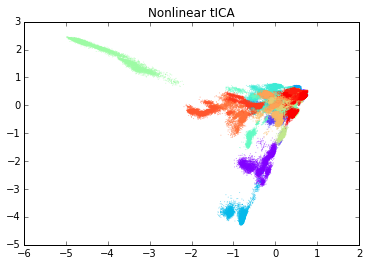

In [84]:
plt.scatter(X_tica_poly_vstack[:,0],X_tica_poly_vstack[:,1],linewidths=0,s=1,
            #c=np.arange(len(X_tica_poly_vstack)),
            c=np.vstack([i*np.ones(len(X_tica_poly[0])) for i in range(len(X_tica_poly))]),
            alpha=0.5,cmap='rainbow')
plt.title('Nonlinear tICA')

In [78]:
tica = tICA(n_components=2,lag_time=10)
X_tica = tica.fit_transform(dhft)

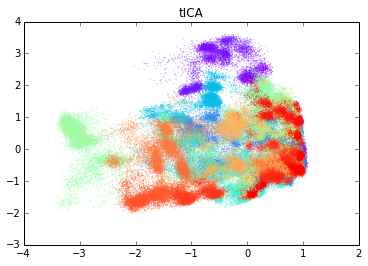

In [79]:
X_tica_vstack = np.vstack(X_tica)
plt.scatter(X_tica_vstack[:,0],X_tica_vstack[:,1],linewidths=0,s=1,
            c=np.arange(len(X_tica_vstack)),alpha=0.5,cmap='rainbow')
plt.title('tICA')

In [87]:
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline



results = dict()
embeddings = [('tICA',X_tica),('Nonlinear tICA',X_tica_poly)]
for (name,dataset) in embeddings:
    pipeline = Pipeline([
        ('cluster', MiniBatchKMeans(n_clusters=100)),
        ('msm', MarkovStateModel(lag_time=1))
    ])
    #pipeline.fit([dataset[:5000]])
    #pipeline.fit(dataset)
    
    pipeline.fit(dataset[:14])
    
    results[name] = pipeline
    #print(pipeline.steps[1][1].score_)
    
    print(pipeline.score(dataset[14:]))
    
    #print(name,pipeline.score([dataset[5000:]]))

MSM contains 1 strongly connected component above weight=1.00. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=1.00. Component 0 selected, with population 100.000000%
8.98677190708
MSM contains 1 strongly connected component above weight=1.00. Component 0 selected, with population 100.000000%
MSM contains 1 strongly connected component above weight=1.00. Component 0 selected, with population 100.000000%
9.18017108578


In [67]:
msm = MarkovStateModel()
msm.score_

ValueError: expected square matrix

In [56]:
X_tica_poly.shape

(10000, 2)